# Curve fitting

* The next two lab sessions are dedicated to the task of fitting a (polynomial) curve to a dataset.
* In this session, you will manually compute gradients that can be used to solve this task.
* In the next session, you will combine these gradients with an algorithm called *gradient descent* to solve this task. You will also use automatic differentiation to obtain the same gradients much more easily.

## Creating the data

* We will start by creating a dataset based on a known function.
* Consider the sinusoidal function $\sin$, and let $y = \sin(x)$.
* The following code generates and plots the dataset.

In [3]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y')

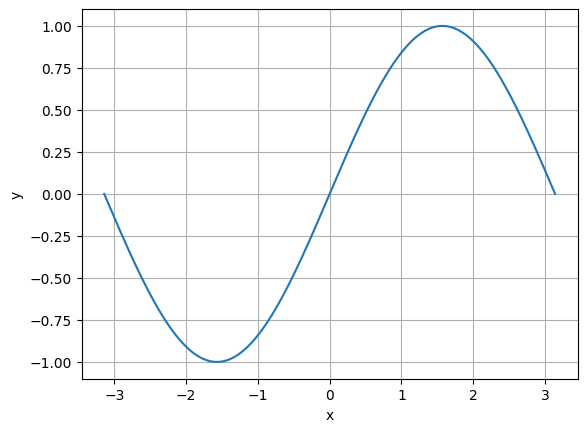

In [4]:
N = 2000 # Number of samples
x = torch.linspace(-torch.pi, torch.pi, N, dtype=torch.float32) # Creates input data, composed of equally spaced points in the range [-pi, pi)
y = torch.sin(x) # Creates output data by applying the function `sin` elementwise to `x`
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

## Polynomial curve fitting

* Suppose that you did not know that the variables $y$ and $x$ are related by $y = \sin(x)$.

* Instead, suppose that you only have access to the pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)$ generated above.

* In this example, we will pretend to believe that the function $f$ that generates $y$ from $x$ is a polynomial of degree $3$ given by
$$ f(x) = w_0 + w_1 x + w_2x^2 + w_3 x^3, $$
where $\mathbf{w} = [ w_0, w_1, w_2, w_3]^T$ is a vector of *unknown* parameters, which we will call *weights*.

* This exercise simulates having a *hypothesis* about the mechanism that generates the data (in this case, the hypothesis is wrong, since the sinusoidal function is not a polynomial!).

* Our goal will be to find weights $\mathbf{w} = [ w_0, w_1, w_2, w_3]^T$ that fit the data as well as possible

Weights: tensor([ 0.7414, -0.4104,  0.3435,  0.2260])


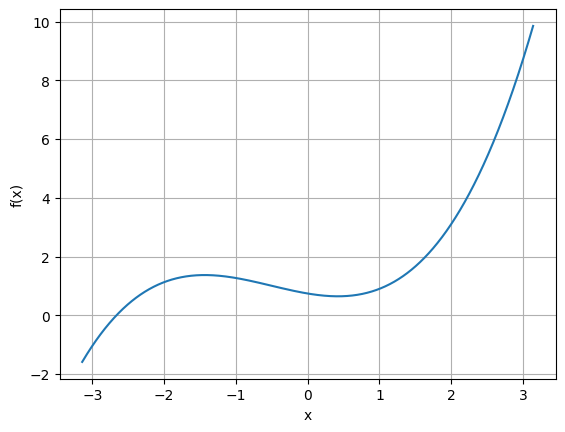

In [5]:
# Run this cell multiple times to see different degree 3 polynomials
w = torch.randn(4, dtype=torch.float32) # Randomly initializes weights

def f(x, w):
    return w[0] + (w[1] * x) + (w[2] * x**2) + (w[3] * x**3)

plt.plot(x, f(x, w)) # Applies a function elementwise to `x` and plots the result
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
print(f'Weights: {w}')

## Gradients  

* Consider the pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)$, where $y_i = \sin(x_i)$ for every $i$.

* For some weights $\mathbf{w} = [ w_0, w_1, w_2, w_3]^T$, let $\tilde{y}_i = f(x_i)$ for every $i$, where $f$ is the polynomial given by $f(x_i) = w_0 + w_1 x_i + w_2x_i^2 + w_3 x_i^3$. We will call $\tilde{y}_i$ the *prediction* for $x_i$.

* Note how the prediction $\tilde{y}_i$ depends on the weights $\mathbf{w}$.

* Our goal is to find weights that make the polynomial "as close as possible" to the function that generated the data.

* We can measure how close the function $f$ is to the (supposedly unknown) function $\sin$ based on the pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)$ by using the squared loss $L$ given by

$$ L = \sum_{i = 1}^N (\tilde{y}_i - y_i)^2 = (\tilde{y}_1 - y_1)^2 + (\tilde{y}_2 - y_2)^2 + \cdots + (\tilde{y}_N - y_N)^2. $$

In [6]:
y_hat = f(x, w)
loss = (y_hat - y).pow(2).sum()
print(loss)

tensor(16143.2207)


* Note how the loss $L$ depends on the weights $\mathbf{w}$ because the predictions $\tilde{y}_1, \ldots, \tilde{y}_N$ depend on $\mathbf{w}$.

* In order to find the weights that minimize this loss (make it as small as possible), we will use an algorithm called *gradient descent*, which requires computing the gradient of $L$ with respect to $\mathbf{w}$, which we will denote by $\nabla L$.

* Recall that the gradient vector $\nabla L$ (of $L$ with respect to $\mathbf{w}$) is given by
$$ \nabla L = \left[ \frac{\partial L}{ \partial w_0}, \frac{\partial L}{ \partial w_1}, \frac{\partial L}{ \partial w_2}, \frac{\partial L}{ \partial w_3} \right]^T .$$

* Your task in this lab session is to use the differentiation rules covered during the lecture to manually derive equations that enables computing $\nabla L$ for any given $\mathbf{w}$.

* Once you have those equations, you should use them to compute the tensor called `gradient` below.

In [7]:
gradient = torch.zeros(4) # This tensor should contain the gradient of `loss` with respect to the weights

* In the next lab session, you will use the tensor `gradient` within an algorithm called *gradient descent* to implement polynomial curve fitting.

* You will also use automatic differentiation to obtain the same gradients much more easily.

* This lab session is the only time we will compute gradients manually, so that you understand what is involved.

* **You will not be asked to compute gradients manually during the exam.**

# Solution

* Consider the dataset $(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)$, the weights $\mathbf{w} = [w_0, w_1, w_2, w_3]^T$, and the prediction $\tilde{y}_i$ given by $ \tilde{y}_i = w_0 + w_1 x_i + w_2x_i^2 + w_3 x_i^3 $ for every $i \in \{1, \ldots, N \}$.

* Recall that the loss $L$ is given by

$$ L = \sum_{i = 1}^N (\tilde{y}_i - y_i)^2 = (\tilde{y}_1 - y_1)^2 + (\tilde{y}_2 - y_2)^2 + \cdots + (\tilde{y}_N - y_N)^2. $$

* Let $u_i = \tilde{y}_i - y_i$ for every $i \in \{1, \ldots, N \}$ be an auxiliary variable, so that

$$ L = \sum_{i = 1}^N u_i^2 = u_1^2 + u_2^2 + \cdots + u_N^2.$$

* For every $k \in \{1, \ldots, N \}$, using the sum rule, the fact that the derivative of a constant with respect to $u_k$ is zero, and the fact that $\partial u^2_k \ /\partial u_k = 2 u_k$,

$$ \frac{\partial L}{\partial u_k} = \frac{\partial u_1^2}{\partial u_k} + \frac{\partial u_2^2}{\partial u_k} + \cdots + \frac{\partial u_N^2}{\partial u_k} = \frac{\partial u_k^2}{\partial u_k} = 2u_k.$$

* For every $j \in \{0, 1, 2, 3\}$, we know that $w_j$ only affects $L$ through changes in some of the $u_k$, which do not affect each other. Using the chain rule,

$$ \frac{\partial L}{\partial w_j} = \sum_{k = 1}^N \frac{\partial L}{\partial u_k} \frac{\partial u_k}{\partial w_j} .$$

* Substituting the previous expression for $\partial L/\partial u_k$ and using the definition of $u_k$,

$$ \frac{\partial L}{\partial w_j} = \sum_{k = 1}^N 2u_k \frac{\partial u_k}{\partial w_j} = 2 \sum_{k=1}^N (\tilde{y}_k - y_k) \frac{\partial u_k}{\partial w_j}.$$

* In order to find an expression for $\partial u_k / \partial w_j$, note that

$$ u_k = \tilde{y}_k - y_k = w_0 + w_1x_k + w_2 x_k^2 + w_3 x_k^3 - y_k.$$

* Using the sum rule, the fact that the derivative of a constant with respect to $w_j$ is zero, and the fact that $\partial (w_jx_k^j) / \partial w_j = x_k^j$,

$$ \frac{ \partial u_k}{ \partial w_j} = \frac{\partial w_0 }{\partial w_j} + \frac{ \partial (w_1x_k)}{\partial w_j} + \frac{\partial (w_2 x_k^2)}{\partial w_j} + \frac{\partial (w_3 x_k^3)}{\partial w_j} - \frac{ \partial y_k}{\partial w_j} =  \frac{\partial (w_j x_k^j) }{\partial w_j} = x_k^j. $$

* Combining the previous results, for every $j \in \{0, 1, 2, 3 \}$,

$$ \frac{\partial L}{\partial w_j} = 2 \sum_{k = 1}^N (\tilde{y}_k - y_k) x_k^j.$$

* If we use the vectors $\mathbf{y} = [y_1, y_2, \ldots, y_N]^T$, $\tilde{\mathbf{y}} = [\tilde{y}_1, \tilde{y}_2, \ldots, \tilde{y}_N]^T$, and $\mathbf{x}^j = [x_1^j, x_2^j, \ldots, x_N^j]^T$ to represent the dataset and the predictions, the previous equation can be rewritten as
$$ \frac{\partial L}{\partial w_j} = 2 ( \tilde{\mathbf{y}} - \mathbf{y})^T\mathbf{x}^j.$$

* In order to solve the task, recall that the gradient vector $\nabla L$ (of $L$ with respect to $\mathbf{w}$) is given by
$$ \nabla L = \left[ \frac{\partial L}{ \partial w_0}, \frac{\partial L}{ \partial w_1}, \frac{\partial L}{ \partial w_2}, \frac{\partial L}{ \partial w_3} \right]^T. $$


In [8]:
# Solution:
for j in range(4):
    gradient[j] = 2 * (y_hat - y).dot(x.pow(j))

print(gradient)

tensor([ 7490.0781,  8243.5723, 36585.5000, 77019.1250])


In [9]:
# Checking the solution using automatic differentiation
w = w.clone().detach()
w.requires_grad_(True)

loss = (f(x, w) - y).pow(2).sum()
loss.backward()

print(w.grad)

tensor([ 7490.0781,  8243.5723, 36585.5000, 77019.1250])
